In [55]:
import numpy as np
import pandas as pd
import re
import json
%matplotlib inline
import matplotlib.pyplot as plt

# Gathering Data

- From three (3) different sources on the Project Details page.
- In three (3) different file formats on the Project Details page.


In [56]:
df_image_predictions = pd.read_csv("image-predictions-3.tsv",sep='\t')
df_1 = pd.read_csv("twitter-archive-enhanced-2.csv")

In [57]:
tweets = []
for line in open('tweet_json_1.txt', 'r'):
    tweets.append(json.loads(line))

In [58]:
tweets[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [59]:
df_json = pd.DataFrame(columns=['id','full_text','date'])

for item in range(len(tweets)):
    ID = tweets[item]['id']
    full_text = tweets[item]['full_text']
    date = tweets[item]['created_at']
    df_json = df_json.append({'id': ID, 'full_text': full_text, 'date': date}, ignore_index=True)

# Assessing Data



In [60]:
df_json.head(1)

,id,full_text,date
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017


In [61]:
df_image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [62]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [63]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [64]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [65]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [66]:
df_1.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [67]:
df_1.query('rating_denominator < 5')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


I read out the url and looked at the picture in the browser.

In [68]:
df_1.expanded_urls[300]

'https://twitter.com/dog_rates/status/836753516572119041/photo/1'

In [69]:
df_1.query('doggo == "doggo" and  pupper == "pupper" ').text

460     This is Dido. She's playing the lead role in "...
531     Here we have Burke (pupper) and Dexter (doggo)...
565     Like doggo, like pupper version 2. Both 11/10 ...
575     This is Bones. He's being haunted by another d...
705     This is Pinot. He's a sophisticated doggo. You...
733     Pupper butt 1, Doggo 0. Both 12/10 https://t.c...
778     RT @dog_rates: Like father (doggo), like son (...
822     RT @dog_rates: This is just downright precious...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
956     Please stop sending it pictures that don't eve...
1063    This is just downright precious af. 12/10 for ...
1113    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object

In [70]:
df_1.query('doggo == "doggo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None


In [71]:
df_1.text[300]

'This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a  doggo anymore. 12/10 https://t.co/GZmNEdyoJY'

In [72]:
df_1[df_1.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


# quality issues

- remove retweets
    - Cleaning: remove retweets
    

- rating is not correct, there are some jokes, for example 1760
- 2335 wrong rating: 1 / 2 instead of 9/10 666287406224695296
- 516 joke rating 24/7 810984652412424192
- 313 wrong rating 960/0 835246439529840640
- 673716320723169284 is donald trump
- 671550332464455680 is no dog
- 670783437142401025 is a Caterpillar
- 667549055577362432 is a fan
- 666104133288665088 is a chicken
- 692417313023332352 is a moose	
- 808106460588765185 two dogs
- 2074 is not a dog --> Snoop Dogg 670842764863651840
    - Cleaning: only use ratings> 7 and <15 for the evaluation


- dog stages not correct (doggo, pupper, ...): 460 is pupper 817777686764523521
    - Cleaning: remove all rows with more than one stage


- 1843 are 8 dogs 675853064436391936
- 453 are 2 dogs 818588835076603904
    - Cleaning: remove Rating_denominator is not equal to 10


- Duplicated urls: 668587383441514497 = 791774931465953280
    - Cleaning: Remove duplicated rows


- None instead of nan
    - Cleaning: is solved when merging the columns


- Date: String to Datetime
    - Cleaning: convert to Datetime

# tidiness issues

- all stage(doggo, pupper, floofer ...) are values and should be in one column
    - Cleaning: merging the columns
- Combine all tables into a single table
    - Cleaning: Combine all tables into a single table



# Cleaning Data

If the Rating_denominator is not equal to 10, there are usually several dogs that are rated or a wrong evaluation. Therefore, all rating_denominators other than 10 are removed.

In [74]:
df_clean = df_1.query('rating_denominator == 10')

In [75]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

In [76]:
df_clean.tweet_id.duplicated().sum()

0

The random inspection of the pictures showed that no dogs were present with ratings <7.

Therefore all ratings <7 will be removed.

Sorry to Donald Trump.

In [77]:
df_clean = df_clean.query('rating_numerator > 7')

The representative ratings are between 7 and 15.

Therefore, all outliers over 15 will board. Sorry to Snoop Dog.

In [78]:
df_clean = df_clean.query('rating_numerator < 15')

In [79]:
df_clean['num_stage'] = (df_clean.doggo == "doggo")*1 + (df_clean.floofer == "floofer")*1 + (df_clean.pupper == "pupper")*1 + (df_clean.puppo == "puppo")*1

if num_stage> 1, the assignment did not work

Reason: often 2 dogs or simply not recognized correctly

Procedure: Remove the lines with incorrect assignment of the stage

In [80]:
df_clean = df_clean.query('num_stage < 2')

In [81]:
df_clean['stage'] = np.NaN
df_clean.loc[df_clean.doggo == 'doggo','stage'] = 'doggo'
df_clean.loc[df_clean.floofer == 'floofer','stage'] = 'floofer'
df_clean.loc[df_clean.pupper == 'pupper','stage'] = 'pupper'
df_clean.loc[df_clean.puppo == 'puppo','stage'] = 'puppo'



convert string to date

In [82]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [83]:
df_clean = df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo', 'num_stage'], axis = 1)

Search for duplicated urls in rows

In [108]:
df_clean[df_clean.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [85]:
df_clean.query('expanded_urls == "https://vine.co/v/ea0OwvPTx9l"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,NaN
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,NaN


the problem of the duplicate url is solved later by another filtering

merge the tables

In [86]:
df_clean = df_clean.merge(df_image_predictions, left_on='tweet_id', right_on='tweet_id')

In [109]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


Try to find more pictures without a dog

In [88]:
df_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,8.585110e-02,False,banana,7.611000e-02,False
21,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,...,1,limousine,0.130432,False,tow_truck,2.917540e-02,False,shopping_cart,2.632080e-02,False
27,886680336477933568,NaN,NaN,2017-07-16 20:14:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,...,1,convertible,0.738995,False,sports_car,1.399520e-01,False,car_wheel,4.417270e-02,False
49,881268444196462592,NaN,NaN,2017-07-01 21:49:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,...,1,tusker,0.473303,False,Indian_elephant,2.456460e-01,False,ibex,5.566070e-02,False
50,880935762899988482,NaN,NaN,2017-06-30 23:47:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,...,1,street_sign,0.251801,False,umbrella,1.151230e-01,False,traffic_light,6.953380e-02,False
59,879050749262655488,NaN,NaN,2017-06-25 18:56:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,...,1,tabby,0.311861,False,window_screen,1.691230e-01,False,Egyptian_cat,1.329320e-01,False
90,870804317367881728,NaN,NaN,2017-06-03 00:48:22,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,https://twitter.com/dog_rates/status/870804317...,11,10,None,...,1,home_theater,0.168290,False,sandbar,9.804040e-02,False,television,7.972940e-02,False
94,870063196459192321,NaN,NaN,2017-05-31 23:43:25,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,...,1,comic_book,0.534409,False,envelope,2.807220e-01,False,book_jacket,4.378550e-02,False
112,864873206498414592,NaN,NaN,2017-05-17 16:00:15,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14,10,None,...,2,pole,0.478616,False,lakeside,1.141820e-01,False,wreck,5.592650e-02,False
115,863907417377173506,NaN,NaN,2017-05-15 00:02:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,...,1,marmot,0.358828,False,meerkat,1.747030e-01,False,weasel,1.234850e-01,False


Since there are many other objects in the pictures, the picture recognition under p1_dog, p2_dop and p3_dog often does not recognize a dog, but there is still a dog in the picture.

Examples:
860276583193509888, 849336543269576704, 670420569653809152, 669972011175813120, 669351434509529089 ...



In [111]:
df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.796000e+03,2.000000e+01,2.000000e+01,1796.000000,1796.0,1796.000000,1796.000000,1.796000e+03,1.796000e+03
mean,7.401096e+17,6.942719e+17,4.196984e+09,11.036192,10.0,1.220490,0.598682,1.347153e-01,5.992616e-02
std,6.828623e+16,4.455619e+16,0.000000e+00,1.429231,0.0,0.582324,0.271644,1.010004e-01,5.087054e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,8.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.775552e+17,6.716877e+17,4.196984e+09,10.000000,10.0,1.000000,0.367245,5.345650e-02,1.592452e-02
50%,7.149960e+17,6.754232e+17,4.196984e+09,11.000000,10.0,1.000000,0.596996,1.186345e-01,4.898335e-02
75%,7.933401e+17,6.947919e+17,4.196984e+09,12.000000,10.0,1.000000,0.848712,1.954432e-01,9.174633e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,14.000000,10.0,4.000000,1.000000,4.676780e-01,2.710420e-01


In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 0 to 1795
Data columns (total 22 columns):
tweet_id                 1796 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1796 non-null datetime64[ns]
source                   1796 non-null object
text                     1796 non-null object
expanded_urls            1796 non-null object
rating_numerator         1796 non-null int64
rating_denominator       1796 non-null int64
name                     1796 non-null object
stage                    283 non-null object
jpg_url                  1796 non-null object
img_num                  1796 non-null int64
p1                       1796 non-null object
p1_conf                  1796 non-null float64
p1_dog                   1796 non-null bool
p2                       1796 non-null object
p2_conf                  1796 non-null float64
p2_dog                   1796 non-null bool
p3                  

# Storing and Acting on Wrangled Data

Save dataset to csv

In [ ]:
df_clean.to_csv('df_clean.txt' ,index=False)

### analysis of connections between ratings and stage

In [114]:
df_clean['rating_numerator'].mean()

11.03619153674833

In [122]:
df_clean['rating_numerator'].count()

1796

In [92]:
df_clean.groupby(['stage'])['rating_numerator'].mean()

stage
doggo      11.888889
floofer    12.000000
pupper     10.879581
puppo      12.000000
Name: rating_numerator, dtype: float64

In [93]:
df_clean.groupby(['stage'])['rating_numerator'].count()

stage
doggo       63
floofer      7
pupper     191
puppo       22
Name: rating_numerator, dtype: int64

The mean value of the ratings is 11. Doggo, Floofer and pupper were rated better on the mean. Pupper was rated worse on average. It seems as if the evaluator likes pupper, floofer and puppo. Apparently he likes Pupper less.

### Is there a connection between the ratings and the recognition of the images via the AI?

Only those lines are used in which a dog was recognized at p1.

In [94]:
df_clean.query('p1_dog')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,...,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False


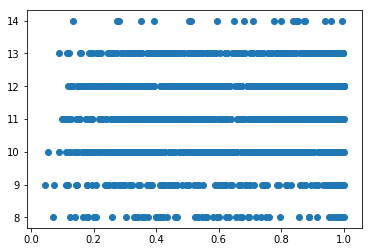

In [95]:
plt.scatter(df_clean.query('p1_dog').p1_conf.values, df_clean.query('p1_dog').rating_numerator.values)

In [96]:
recognition_via_rating = df_clean.query('p1_dog').groupby(['rating_numerator'])['p1_conf'].mean()

In [121]:
df_clean.query('p1_dog').groupby(['rating_numerator'])['p1_conf'].count()

rating_numerator
8      58
9     107
10    318
11    305
12    375
13    212
14     21
Name: p1_conf, dtype: int64

In [97]:
recognition_via_rating

rating_numerator
8     0.544809
9     0.565559
10    0.593947
11    0.627998
12    0.634476
13    0.637023
14    0.659506
Name: p1_conf, dtype: float64

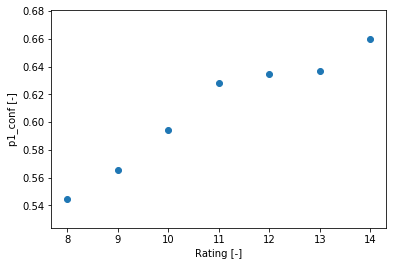

In [123]:
plt.scatter(recognition_via_rating.index, recognition_via_rating.values)
plt.xlabel('Rating [-]')
plt.ylabel('p1_conf [-]');

p1_conf increases with increasing rating. It seems like the AI ​​has an easier time with images with good ratings.

### Is there a connection between the stage and the recognition of the images via the AI?

Only those lines are used in which a dog was recognized at p1.

In [117]:
recognition_via_stage = df_clean.query('p1_dog').groupby(['stage'])['p1_conf'].mean()

In [120]:
df_clean.query('p1_dog').groupby(['stage'])['p1_conf'].count()

stage
doggo       48
floofer      7
pupper     141
puppo       19
Name: p1_conf, dtype: int64

In [118]:
recognition_via_stage

stage
doggo      0.569301
floofer    0.609204
pupper     0.663146
puppo      0.708338
Name: p1_conf, dtype: float64

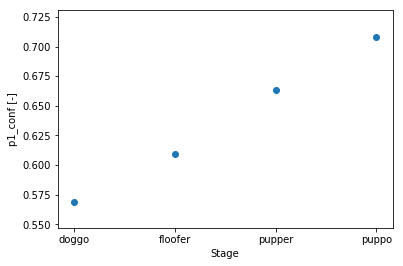

In [125]:
plt.scatter(recognition_via_stage.index, recognition_via_stage.values)
plt.xlabel('Stage')
plt.ylabel('p1_conf [-]');

The AI finds it easier to detect with small dogs than with large ones.

# I only reproduced this code, but did not use it to collect the data.

In [101]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
df_1 = pd.read_csv("twitter-archive-enhanced-2.csv")
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_1.tweet_id.values[0:10] # Beschränkt auf die ersten Drei Einträge


len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
1.5891523419995792
{892420643555336193: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 892177421306343426: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891815181378084864: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891689557279858688: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891327558926688256: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891087950875897856: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 890971913173991426: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 890729181411237888: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],